In [1]:
import calendar
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def symbol_to_path(symbol, base_dir="Daily"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def normalize_data(df):
    return df/df.ix[0,:]

def get_data(symbols, dates,col):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'TASI' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'TASI')
    dateparse = lambda x: pd.datetime.strptime(x, '%Y%m%d')
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=['Date'],date_parser=dateparse, usecols=['Date', col ], na_values=['nan'])
        df_temp = df_temp.rename(columns={col: symbol})
        df = df.join(df_temp)
        if symbol == 'TASI':  # drop dates SPY did not trade
            df = df.dropna(subset=["TASI"])

    return df

def compute_daily_returns(df):
    daily_returns = (df/df.shift(1))-1 
    daily_returns = daily_returns[1:]
    # daily_returns.plot(kind="hist")
    plt.show()
    return daily_returns

def load_df():
    dates = pd.date_range('01/01/2002', '01/01/2017')
    N= (dates[-1]-dates[0])/365
    N = str(N).split()[0]
    files = os.listdir("AdjDaily")
    symbols=[]
    for name in files:
        if name[0].isdigit():
            symbols.append(name.split('.')[0])
    df = get_data(symbols, dates, 'Close')
    df.to_pickle('database.pkl')
    return df

def stats(df,period):
    if period == 'W':
        p = 52.0
    if period == 'M':
        p = 12.0
    if period == 'D':
        p = 365.0
    cagr = (df.iloc[-1]/df.iloc[0])**(1.0/(len(df)/p)) - 1.0
    dr = compute_daily_returns(df)
    sharpe = np.sqrt(p) * dr.mean() / dr.std()
    print (' CAGR(%) = ' + str(cagr * 100))
    print (' Sharpe ratio = ' + str(sharpe))

def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

def pos_val(df,capital=100000,alloc=[]):
    if alloc == []:
        alloc= 1.0/len(df.columns)
    return (normalize_data(df) * alloc * capital).sum(axis=1)

In [ ]:
try:
    df = pd.read_pickle('database.pkl')
except:
    print ('No pkl')
    df = load_df()


In [4]:
dir = 'AdjDaily/'
df = pd.read_csv(dir+'1120.csv',index_col='Date')

In [5]:
df.head()

,Sector,Name,Open,High,Low,Close,Vol
Date,,,,,,,
01/01/2002,Banks,Al Rajhi Bank,18.90,19.15,18.90,19.15,568835
02/01/2002,Banks,Al Rajhi Bank,19.15,19.15,18.90,19.15,746459
03/01/2002,Banks,Al Rajhi Bank,19.15,19.15,18.90,19.15,319101
05/01/2002,Banks,Al Rajhi Bank,19.15,19.15,18.90,19.15,487011
06/01/2002,Banks,Al Rajhi Bank,19.15,19.15,19.15,19.15,366405


In [6]:
stock = df[['Close','Vol']]
stock.head()

,Close,Vol
Date,,
01/01/2002,19.15,568835
02/01/2002,19.15,746459
03/01/2002,19.15,319101
05/01/2002,19.15,487011
06/01/2002,19.15,366405


In [10]:
stock['90_VOL_MVA'] = stock['Vol'].rolling(90).mean()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
stock.head(200)

,Close,Vol,180_VOL_MVA,90_VOL_MVA
Date,,,,
01/01/2002,19.15,568835,NaN,NaN
02/01/2002,19.15,746459,NaN,NaN
03/01/2002,19.15,319101,NaN,NaN
05/01/2002,19.15,487011,NaN,NaN
06/01/2002,19.15,366405,NaN,NaN
07/01/2002,19.15,478417,NaN,NaN
08/01/2002,19.15,206222,NaN,NaN
09/01/2002,19.15,124145,NaN,NaN
10/01/2002,19.15,140033,NaN,NaN


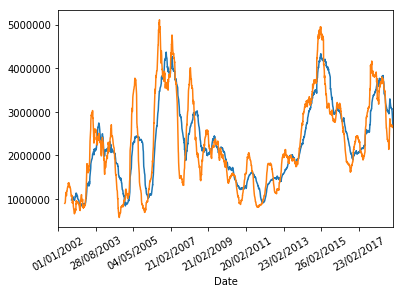

In [27]:
stock['180_VOL_MVA'].plot()
stock['90_VOL_MVA'].plot(rot='30')

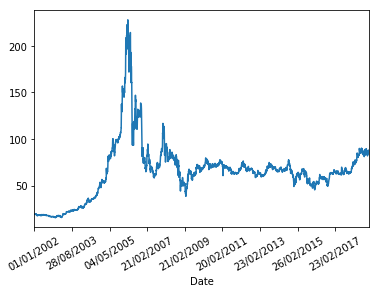

In [28]:
stock['Close'].plot(rot='30')

In [39]:
stock09 = stock[1970:]

In [51]:
stock09[['180WChange','90WChange']] = stock09[['180_VOL_MVA','90_VOL_MVA']].pct_change(periods=7)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [52]:
stock09

,Close,Vol,180_VOL_MVA,90_VOL_MVA,180WChange,90WChange
Date,,,,,,
10/01/2009,56.08,2092341,2.148510e+06,2.581599e+06,NaN,NaN
11/01/2009,56.08,2094990,2.144997e+06,2.553303e+06,NaN,NaN
12/01/2009,55.85,728645,2.140791e+06,2.528702e+06,NaN,NaN
13/01/2009,55.16,1147097,2.133964e+06,2.514167e+06,NaN,NaN
14/01/2009,54.23,711370,2.106211e+06,2.495593e+06,NaN,NaN
17/01/2009,51.46,1306561,2.081778e+06,2.482585e+06,NaN,NaN
18/01/2009,51.46,959976,2.058778e+06,2.479183e+06,NaN,NaN
19/01/2009,51.00,1114314,2.045075e+06,2.484071e+06,-0.048143,-0.037778
20/01/2009,50.54,3120656,2.048704e+06,2.514081e+06,-0.044892,-0.015361


In [3]:
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')

In [4]:
df = pd.read_csv('Equites_Historical_NonAdjusted_Prices.csv',index_col=['Symbol','Date'],
                parse_dates=['Date'],date_parser=dateparse)

FileNotFoundError: [Errno 2] File b'Equites_Historical_NonAdjusted_Prices.csv' does not exist: b'Equites_Historical_NonAdjusted_Prices.csv'

In [5]:
df.head()

Industry Group Company Name    Open    High     Low   Close  \
Symbol Date                                                                     
1010   2001-12-31          Banks   Riyad Bank  229.75  231.50  229.00  231.50   
       2002-01-01          Banks   Riyad Bank  231.50  234.25  230.00  234.00   
       2002-01-02          Banks   Riyad Bank  234.00  236.00  233.75  234.75   
       2002-01-03          Banks   Riyad Bank  234.75  236.75  235.25  236.50   
       2002-01-05          Banks   Riyad Bank  236.50  239.00  237.50  238.00   

                   Volume Traded  
Symbol Date                       
1010   2001-12-31          58187  
       2002-01-01         136490  
       2002-01-02         195729  
       2002-01-03          66870  
       2002-01-05         201129

In [6]:
df2 = pd.read_csv('Equites_Historical_Adjusted_Prices_Report.csv',index_col=['Symbol','Date'],
                parse_dates=['Date'],date_parser=dateparse)

In [7]:
df2.head()

Industry Group Company Name  Open  High   Low  Close  \
Symbol Date                                                              
1010   2001-12-31          Banks   Riyad Bank  7.65  7.75  7.65   7.75   
       2002-01-01          Banks   Riyad Bank  7.75  7.75  7.65   7.75   
       2002-01-02          Banks   Riyad Bank  7.75  7.90  7.75   7.75   
       2002-01-03          Banks   Riyad Bank  7.75  7.90  7.75   7.88   
       2002-01-05          Banks   Riyad Bank  7.90  7.90  7.90   7.88   

                   Volume Traded  
Symbol Date                       
1010   2001-12-31        1747716  
       2002-01-01        4099612  
       2002-01-02        5878894  
       2002-01-03        2008516  
       2002-01-05        6041096

In [8]:
df2['split'] = df['Close'] / df2['Close']

In [20]:
df2.shape

(591035, 8)

In [48]:
df2['Close'].unstack(level=0)

Symbol,1010,1020,1030,1040,1050,1060,1080,1090,1120,1140,...,8240,8250,8260,8270,8280,8290,8300,8310,8311,8312
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,7.75,2.38,6.00,6.25,9.94,8.90,5.83,17.76,12.30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-01,7.75,2.51,6.00,6.38,10.01,9.10,5.93,17.76,12.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,7.75,2.51,6.00,6.38,10.01,9.10,5.93,17.64,12.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-03,7.88,2.51,6.00,6.25,10.01,9.10,5.83,17.64,12.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-05,7.88,2.51,6.16,6.25,10.01,9.20,5.93,17.64,12.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-06,7.88,2.51,6.16,6.42,10.28,9.30,5.93,17.76,12.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-07,7.75,2.51,6.00,6.42,10.01,9.20,5.93,17.76,12.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-08,7.88,2.51,6.00,6.32,10.13,9.30,5.93,17.88,12.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-09,7.88,2.51,6.16,6.32,10.13,9.30,5.93,17.88,12.45,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
divdends = pd.read_csv('Dividend_Master_Information_Report.csv',index_col=['Symbol','Due Date']
                       ,usecols=['Symbol','Due Date','Amount'],
                      parse_dates=['Due Date'],date_parser=dateparse)

In [11]:
divdends.index.names = ['Symbol','Date']
divdends.head()

Amount
Symbol Date              
1010   2002-03-13    15.0
       2002-07-20     7.5
       2003-03-04     8.0
       2003-07-09     8.0
       2004-03-09     9.0

In [39]:
np.where(divdends.index.duplicated())

(array([], dtype=int64),)

In [38]:
divdends = divdends.pivot_table(index=['Symbol','Date'],aggfunc='sum')

In [45]:
test = df2.join(divdends,on=['Symbol','Date'])

In [46]:
test.shape

(591035, 9)

In [47]:
test.loc[(1030,'03/10/2002')]

Industry Group                    Banks
Company Name      Saudi Investment Bank
Open                               6.15
High                               6.15
Low                                6.15
Close                              6.16
Volume Traded                    143169
split                           34.2532
Amount                                8
Name: (1030, 2002-03-10 00:00:00), dtype: object

In [50]:
F = (test.Close + (test.Amount / test.split ))/ test.Close
F.dropna(inplace=True)
F = F.sort_index(ascending=False)
F = F.to_frame(name='F')
F.index.names = ['Symbol','Date']
F['F'] = F.groupby('Symbol')['F'].cumprod()
F.head()

F
Symbol Date                
8270   2019-09-26  1.059880
       2017-06-06  1.078072
8210   2019-07-14  1.014098
       2018-06-11  1.036683
       2017-05-21  1.050507

In [51]:
test = df2.join(F,on=['Symbol','Date'])

In [52]:
test.shape

(591035, 9)

In [53]:
test.loc[(1010,'03/13/2002')]

Industry Group         Banks
Company Name      Riyad Bank
Open                     9.5
High                     9.5
Low                      9.4
Close                   9.38
Volume Traded        5319388
split                30.2239
F                    2.42061
Name: (1010, 2002-03-13 00:00:00), dtype: object

In [54]:
test['F'].fillna(method='bfill',inplace=True)
test['F'].fillna(1,inplace=True)

In [55]:
test.loc[8312]

,Industry Group,Company Name,Open,High,Low,Close,Volume Traded,split,F
Date,,,,,,,,,
2012-06-24,Insurance,Alinma Tokio Marine Co.,79.00,88.00,64.25,68.22,17134018,1.136030,1.0
2012-06-25,Insurance,Alinma Tokio Marine Co.,67.75,68.50,62.00,62.49,5805492,1.136182,1.0
2012-06-26,Insurance,Alinma Tokio Marine Co.,63.50,68.75,63.00,68.65,9255201,1.136198,1.0
2012-06-27,Insurance,Alinma Tokio Marine Co.,69.75,72.25,64.75,67.99,12215036,1.136196,1.0
2012-06-30,Insurance,Alinma Tokio Marine Co.,70.25,73.25,69.25,71.95,7252217,1.136206,1.0
2012-07-01,Insurance,Alinma Tokio Marine Co.,72.50,72.50,68.00,67.99,4342390,1.136196,1.0
2012-07-02,Insurance,Alinma Tokio Marine Co.,67.75,68.75,66.25,66.45,1693627,1.136193,1.0
2012-07-03,Insurance,Alinma Tokio Marine Co.,66.50,69.25,66.50,68.22,2501932,1.136030,1.0
2012-07-04,Insurance,Alinma Tokio Marine Co.,68.25,68.75,66.50,66.90,1337829,1.136024,1.0


In [56]:
test['AdjClose'] = test.Close / test.F

In [57]:
test = test.sort_index()

In [58]:
test.index.names = ['Symbol','Date']

In [59]:
test.xs(8312)

,Industry Group,Company Name,Open,High,Low,Close,Volume Traded,split,F,AdjClose
Date,,,,,,,,,,
2012-06-24,Insurance,Alinma Tokio Marine Co.,79.00,88.00,64.25,68.22,17134018,1.136030,1.0,68.22
2012-06-25,Insurance,Alinma Tokio Marine Co.,67.75,68.50,62.00,62.49,5805492,1.136182,1.0,62.49
2012-06-26,Insurance,Alinma Tokio Marine Co.,63.50,68.75,63.00,68.65,9255201,1.136198,1.0,68.65
2012-06-27,Insurance,Alinma Tokio Marine Co.,69.75,72.25,64.75,67.99,12215036,1.136196,1.0,67.99
2012-06-30,Insurance,Alinma Tokio Marine Co.,70.25,73.25,69.25,71.95,7252217,1.136206,1.0,71.95
2012-07-01,Insurance,Alinma Tokio Marine Co.,72.50,72.50,68.00,67.99,4342390,1.136196,1.0,67.99
2012-07-02,Insurance,Alinma Tokio Marine Co.,67.75,68.75,66.25,66.45,1693627,1.136193,1.0,66.45
2012-07-03,Insurance,Alinma Tokio Marine Co.,66.50,69.25,66.50,68.22,2501932,1.136030,1.0,68.22
2012-07-04,Insurance,Alinma Tokio Marine Co.,68.25,68.75,66.50,66.90,1337829,1.136024,1.0,66.90


In [60]:
test.to_pickle('AdjustedClose.pkl')

In [61]:
normed = test.groupby('Symbol').apply(lambda s:s[(['Close','AdjClose'])]/s[(['Close','AdjClose'])].iloc[0])

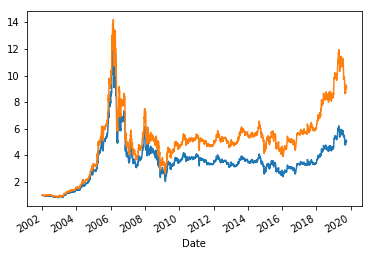

In [62]:
normed.xs(1120)['Close'].plot()
normed.xs(1120)['AdjClose'].plot()

In [63]:
normed.to_pickle('normalized.pkl')